In [2]:
# Import required dependencies, libraries and modules.
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [4]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# from imblearn.metrics import classification_report_imbalanced

In [5]:
import matplotlib.pyplot as plt
# from imblearn.ensemble import BalancedRandomForestClassifier

In [6]:
# Import 2018 stock data into a DataFrame
stocks_2018_df = pd.read_csv('Resources/2018_Financial_Data.csv')
stocks_2018_df

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [7]:
# List of columns to keep from original dataset to keep
cols_to_keep = ["Sector","R&D Expenses","EPS","EBITDA","Net Profit Margin","Operating Cash Flow",
           "Free Cash Flow","priceEarningsRatio","grossProfitMargin","returnOnAssets","returnOnEquity",
           "inventoryTurnover","currentRatio","quickRatio","assetTurnover","debtEquityRatio","Working Capital","Class"]
len(cols_to_keep)

18

In [11]:
stocks_df = stocks_2018_df[cols_to_keep]
stocks_df

,Sector,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnAssets,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Working Capital,Class
0,Consumer Cyclical,0.000000e+00,2.56,2.932900e+10,0.1241,2.429700e+10,1.198500e+10,13.3008,1.000000,0.3033,0.1638,0.0000,0.792000,0.540449,0.375499,1.5604,-5.755000e+09,1
1,Energy,0.000000e+00,0.66,6.410000e+09,0.1138,5.043000e+09,2.119000e+09,23.3030,0.484729,0.0446,0.0478,34.9666,0.757000,0.632261,0.179342,1.1083,-1.835000e+09,1
2,Technology,1.354300e+10,4.57,3.227600e+10,0.2972,2.943200e+10,1.425100e+10,10.2691,0.617336,0.3444,0.2824,9.9534,1.731000,1.105016,0.553660,0.3535,1.216100e+10,1
3,Technology,2.141000e+09,12.27,1.940400e+10,0.4651,1.740000e+10,8.521000e+09,4.2999,0.588694,0.4163,0.4377,9.0476,2.787000,2.134168,0.700641,0.1436,1.028500e+10,1
4,Industrials,0.000000e+00,-2.62,-8.489000e+09,-0.1838,4.246000e+09,7.090000e+08,0.0000,0.215056,NaN,-0.7216,7.3214,1.718208,1.402587,0.390955,3.3440,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,Real Estate,0.000000e+00,-0.08,-3.757783e+06,0.0000,-6.299496e+06,-6.290432e+06,0.0000,NaN,NaN,-0.0800,0.0000,NaN,0.002142,0.000000,0.6850,NaN,0
4388,Basic Materials,4.759000e+06,-0.92,-8.974000e+06,-16.4928,-8.754000e+06,-8.796000e+06,0.0000,1.000000,-0.8423,-1.6093,0.0000,3.886000,3.815356,0.042901,1.1346,4.736000e+06,0
4389,Basic Materials,1.652633e+06,0.52,1.006324e+07,0.1279,-2.234995e+06,-2.702133e+06,6.1538,0.333257,0.2228,0.1895,3.9427,1.644000,1.189722,0.718395,0.5202,2.521620e+07,0
4390,Industrials,1.031715e+07,-0.18,-1.644192e+07,0.0000,-1.114753e+07,-1.176652e+07,0.0000,NaN,-7.5619,-4.5523,0.0000,1.625000,0.839010,0.000000,0.0000,1.484439e+06,0


In [12]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector               4392 non-null   object 
 1   R&D Expenses         4155 non-null   float64
 2   EPS                  4327 non-null   float64
 3   EBITDA               4209 non-null   float64
 4   Net Profit Margin    4216 non-null   float64
 5   Operating Cash Flow  4334 non-null   float64
 6   Free Cash Flow       4225 non-null   float64
 7   priceEarningsRatio   4140 non-null   float64
 8   grossProfitMargin    4045 non-null   float64
 9   returnOnAssets       3286 non-null   float64
 10  returnOnEquity       4136 non-null   float64
 11  inventoryTurnover    4153 non-null   float64
 12  currentRatio         4141 non-null   float64
 13  quickRatio           4143 non-null   float64
 14  assetTurnover        4162 non-null   float64
 15  debtEquityRatio      4141 non-null   f

In [13]:
stocks_df.describe()

,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnAssets,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Working Capital,Class
count,4.155000e+03,4327.000000,4.209000e+03,4216.000000,4.334000e+03,4.225000e+03,4140.000000,4045.000000,3286.000000,4.136000e+03,4153.000000,4141.000000,4143.000000,4162.000000,4141.000000,3.289000e+03,4392.000000
mean,1.180176e+08,-69.937477,9.853868e+08,-4.820220,9.263815e+08,5.063973e+08,24.042168,0.495431,-0.002996,2.685090e+03,48.044948,4.271089,4.073948,0.675478,0.773634,7.820450e+09,0.693534
std,9.330891e+08,5718.694086,3.863663e+09,103.478216,1.020974e+10,3.049297e+09,105.518285,1.515114,6.690527,1.732375e+05,1494.046198,57.612570,70.098656,0.758350,13.318040,3.177981e+11,0.461078
min,-1.042000e+08,-359825.000000,-8.992000e+09,-5009.166700,-3.400000e+11,-6.227011e+10,0.000000,-87.093692,-193.679200,-3.477246e+04,0.000000,-1.203000,0.000000,-0.083376,-251.027000,-3.479000e+12,0.000000
25%,0.000000e+00,-0.390000,1.536000e+06,-0.027800,7.447862e+05,-1.085712e+07,0.000000,0.286457,-0.166175,-8.107500e-02,0.000000,0.871000,0.571537,0.126476,0.024000,9.005333e+06,0.000000
50%,0.000000e+00,0.690000,8.453200e+07,0.046150,6.589800e+07,2.472500e+07,10.761150,0.490746,0.043400,7.485000e-02,3.237400,1.662000,1.142864,0.477829,0.465000,9.620400e+07,1.000000
75%,1.450150e+07,2.310000,4.777620e+08,0.146500,3.748750e+08,2.098000e+08,20.462250,0.827075,0.179825,1.532250e-01,10.604000,3.016000,2.298005,0.948632,1.115700,4.123800e+08,1.000000
max,2.883700e+10,101641.000000,8.380600e+10,1056.465800,4.470000e+11,9.414620e+10,3842.000000,1.896479,203.455900,1.114114e+07,95827.710300,3192.192308,3180.813708,10.237198,637.229900,1.472140e+13,1.000000


In [14]:
stocks_df.isnull().sum()

Sector                    0
R&D Expenses            237
EPS                      65
EBITDA                  183
Net Profit Margin       176
Operating Cash Flow      58
Free Cash Flow          167
priceEarningsRatio      252
grossProfitMargin       347
returnOnAssets         1106
returnOnEquity          256
inventoryTurnover       239
currentRatio            251
quickRatio              249
assetTurnover           230
debtEquityRatio         251
Working Capital        1103
Class                     0
dtype: int64

In [15]:
# Drop returnOnAssets and Working Capital since there are too many null values.
# Also Working Capital overlaps with Current Ratio
stocks_df = stocks_df.drop(columns=["returnOnAssets","Working Capital"])
stocks_df

,Sector,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Class
0,Consumer Cyclical,0.000000e+00,2.56,2.932900e+10,0.1241,2.429700e+10,1.198500e+10,13.3008,1.000000,0.1638,0.0000,0.792000,0.540449,0.375499,1.5604,1
1,Energy,0.000000e+00,0.66,6.410000e+09,0.1138,5.043000e+09,2.119000e+09,23.3030,0.484729,0.0478,34.9666,0.757000,0.632261,0.179342,1.1083,1
2,Technology,1.354300e+10,4.57,3.227600e+10,0.2972,2.943200e+10,1.425100e+10,10.2691,0.617336,0.2824,9.9534,1.731000,1.105016,0.553660,0.3535,1
3,Technology,2.141000e+09,12.27,1.940400e+10,0.4651,1.740000e+10,8.521000e+09,4.2999,0.588694,0.4377,9.0476,2.787000,2.134168,0.700641,0.1436,1
4,Industrials,0.000000e+00,-2.62,-8.489000e+09,-0.1838,4.246000e+09,7.090000e+08,0.0000,0.215056,-0.7216,7.3214,1.718208,1.402587,0.390955,3.3440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,Real Estate,0.000000e+00,-0.08,-3.757783e+06,0.0000,-6.299496e+06,-6.290432e+06,0.0000,NaN,-0.0800,0.0000,NaN,0.002142,0.000000,0.6850,0
4388,Basic Materials,4.759000e+06,-0.92,-8.974000e+06,-16.4928,-8.754000e+06,-8.796000e+06,0.0000,1.000000,-1.6093,0.0000,3.886000,3.815356,0.042901,1.1346,0
4389,Basic Materials,1.652633e+06,0.52,1.006324e+07,0.1279,-2.234995e+06,-2.702133e+06,6.1538,0.333257,0.1895,3.9427,1.644000,1.189722,0.718395,0.5202,0
4390,Industrials,1.031715e+07,-0.18,-1.644192e+07,0.0000,-1.114753e+07,-1.176652e+07,0.0000,NaN,-4.5523,0.0000,1.625000,0.839010,0.000000,0.0000,0


In [16]:
# Drop null values and reset index
stocks_df = stocks_df.dropna().reset_index(drop=True)
stocks_df

,Sector,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Class
0,Consumer Cyclical,0.000000e+00,2.56,2.932900e+10,0.1241,2.429700e+10,1.198500e+10,13.3008,1.000000,0.1638,0.0000,0.792000,0.540449,0.375499,1.5604,1
1,Energy,0.000000e+00,0.66,6.410000e+09,0.1138,5.043000e+09,2.119000e+09,23.3030,0.484729,0.0478,34.9666,0.757000,0.632261,0.179342,1.1083,1
2,Technology,1.354300e+10,4.57,3.227600e+10,0.2972,2.943200e+10,1.425100e+10,10.2691,0.617336,0.2824,9.9534,1.731000,1.105016,0.553660,0.3535,1
3,Technology,2.141000e+09,12.27,1.940400e+10,0.4651,1.740000e+10,8.521000e+09,4.2999,0.588694,0.4377,9.0476,2.787000,2.134168,0.700641,0.1436,1
4,Industrials,0.000000e+00,-2.62,-8.489000e+09,-0.1838,4.246000e+09,7.090000e+08,0.0000,0.215056,-0.7216,7.3214,1.718208,1.402587,0.390955,3.3440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,Consumer Defensive,0.000000e+00,0.37,6.089738e+06,0.1239,2.302113e+06,-2.959752e+06,18.6216,0.640453,0.0601,1.4871,5.307000,2.240921,0.375387,0.1756,0
3914,Consumer Cyclical,0.000000e+00,0.06,5.710000e+06,0.0307,6.593000e+06,5.117000e+06,18.8333,0.923814,0.0109,35.6801,1.481000,1.231509,0.256890,0.1960,1
3915,Basic Materials,4.759000e+06,-0.92,-8.974000e+06,-16.4928,-8.754000e+06,-8.796000e+06,0.0000,1.000000,-1.6093,0.0000,3.886000,3.815356,0.042901,1.1346,0
3916,Basic Materials,1.652633e+06,0.52,1.006324e+07,0.1279,-2.234995e+06,-2.702133e+06,6.1538,0.333257,0.1895,3.9427,1.644000,1.189722,0.718395,0.5202,0


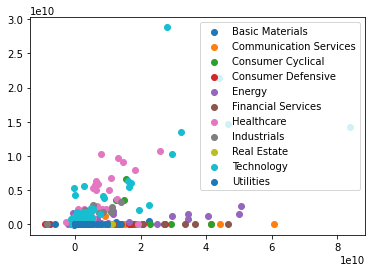

<Figure size 5000x5000 with 0 Axes>

In [17]:
groups = stocks_df.groupby('Sector')
for name, group in groups:
    fig = plt.scatter(group['EBITDA'],group['R&D Expenses'], marker = 'o', label = name)
plt.legend()
fig = plt.figure(figsize=(50,50), dpi=100)
plt.show()
fig.savefig('test.png')

In [18]:
# Generate our categorical variable lists
stocks_cat = stocks_df.dtypes[stocks_df.dtypes == "object"].index.tolist()
stocks_cat

['Sector']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(stocks_df[stocks_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(stocks_cat)
encode_df

,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3913,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3914,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
stocks_df = stocks_df.merge(encode_df,left_index=True, right_index=True)
stocks_df = stocks_df.drop(columns="Sector")
stocks_df

,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnEquity,inventoryTurnover,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,0.000000e+00,2.56,2.932900e+10,0.1241,2.429700e+10,1.198500e+10,13.3008,1.000000,0.1638,0.0000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,0.66,6.410000e+09,0.1138,5.043000e+09,2.119000e+09,23.3030,0.484729,0.0478,34.9666,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.354300e+10,4.57,3.227600e+10,0.2972,2.943200e+10,1.425100e+10,10.2691,0.617336,0.2824,9.9534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.141000e+09,12.27,1.940400e+10,0.4651,1.740000e+10,8.521000e+09,4.2999,0.588694,0.4377,9.0476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000e+00,-2.62,-8.489000e+09,-0.1838,4.246000e+09,7.090000e+08,0.0000,0.215056,-0.7216,7.3214,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,0.000000e+00,0.37,6.089738e+06,0.1239,2.302113e+06,-2.959752e+06,18.6216,0.640453,0.0601,1.4871,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3914,0.000000e+00,0.06,5.710000e+06,0.0307,6.593000e+06,5.117000e+06,18.8333,0.923814,0.0109,35.6801,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3915,4.759000e+06,-0.92,-8.974000e+06,-16.4928,-8.754000e+06,-8.796000e+06,0.0000,1.000000,-1.6093,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916,1.652633e+06,0.52,1.006324e+07,0.1279,-2.234995e+06,-2.702133e+06,6.1538,0.333257,0.1895,3.9427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = stocks_df.drop(columns = ['Class'])
y = stocks_df['Class']

In [22]:
# Split the dataset with Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [25]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 128, random_state= 78)

In [26]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [27]:
# Making predictions
predictions = rf_model.predict(X_test_scaled)

In [28]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

In [30]:
# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Acutal 1'], columns=['Prediction 0', 'Prediction 1'])
cm_df

,Prediction 0,Prediction 1
Actual 0,99,220
Acutal 1,69,592


In [31]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [32]:
# Displaying results
print('Confusion Matrix')
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Prediction 0,Prediction 1
Actual 0,99,220
Acutal 1,69,592


Accuracy Score: 0.7051020408163265
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.31      0.41       319
           1       0.73      0.90      0.80       661

    accuracy                           0.71       980
   macro avg       0.66      0.60      0.61       980
weighted avg       0.68      0.71      0.67       980



In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=78)
classifier

LogisticRegression(random_state=78)

In [34]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
                  random_state = 78, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=78)

In [35]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=78)

In [36]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
2956,1,0
1486,0,1
2430,1,1
1066,1,1
3079,1,1
...,...,...
2428,0,0
142,1,1
1830,1,1
3761,1,1


In [37]:
accuracy_score(y_test, predictions)

0.6704081632653062

In [38]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.5869917812376991

In [39]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.49      0.35      0.83      0.41      0.54      0.27       319
          1       0.72      0.83      0.35      0.77      0.54      0.30       661

avg / total       0.65      0.67      0.50      0.65      0.54      0.29       980



In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state =78)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [41]:
Counter(y_resampled)
# now balanced

Counter({1: 2051, 0: 2051})

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state = 78)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=78)

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[225,  94],
       [279, 382]])

In [44]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6416207038826893

In [45]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.71      0.58      0.55      0.64      0.41       319
          1       0.80      0.58      0.71      0.67      0.64      0.40       661

avg / total       0.69      0.62      0.66      0.63      0.64      0.41       980



In [46]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state =78)
X_resampled2, y_resampled2 = rus.fit_resample(X_train_scaled, y_train)
Counter(y_resampled2)

Counter({0: 887, 1: 887})

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', random_state =78)
model.fit(X_resampled2, y_resampled2)

LogisticRegression(random_state=78)

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[221,  98],
       [284, 377]])

In [51]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6315689631459885

In [52]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.44      0.69      0.57      0.54      0.63      0.40       319
          1       0.79      0.57      0.69      0.66      0.63      0.39       661

avg / total       0.68      0.61      0.65      0.62      0.63      0.39       980



In [1]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state =78)
X_resampled3, y_resampled3 = cc.fit_resample(X_train_scaled, y_train)
Counter(y_resampled3)

NameError: name 'X_train_scaled' is not defined